In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import product
import sys

from solvers import *
from helper_func import *

In [ ]:
#JP, JE, UP, UE = VI(n=5, Delta_max=1e-2, delta_max=1e-2, gamma=0.7, K_max=20, k_max=20, from_=0, to_=11)

In [16]:
n = 21

JP, JE, UP, UE = readAll(n, 'without')

UP = UP.astype(int)
UE = UE.astype(int)

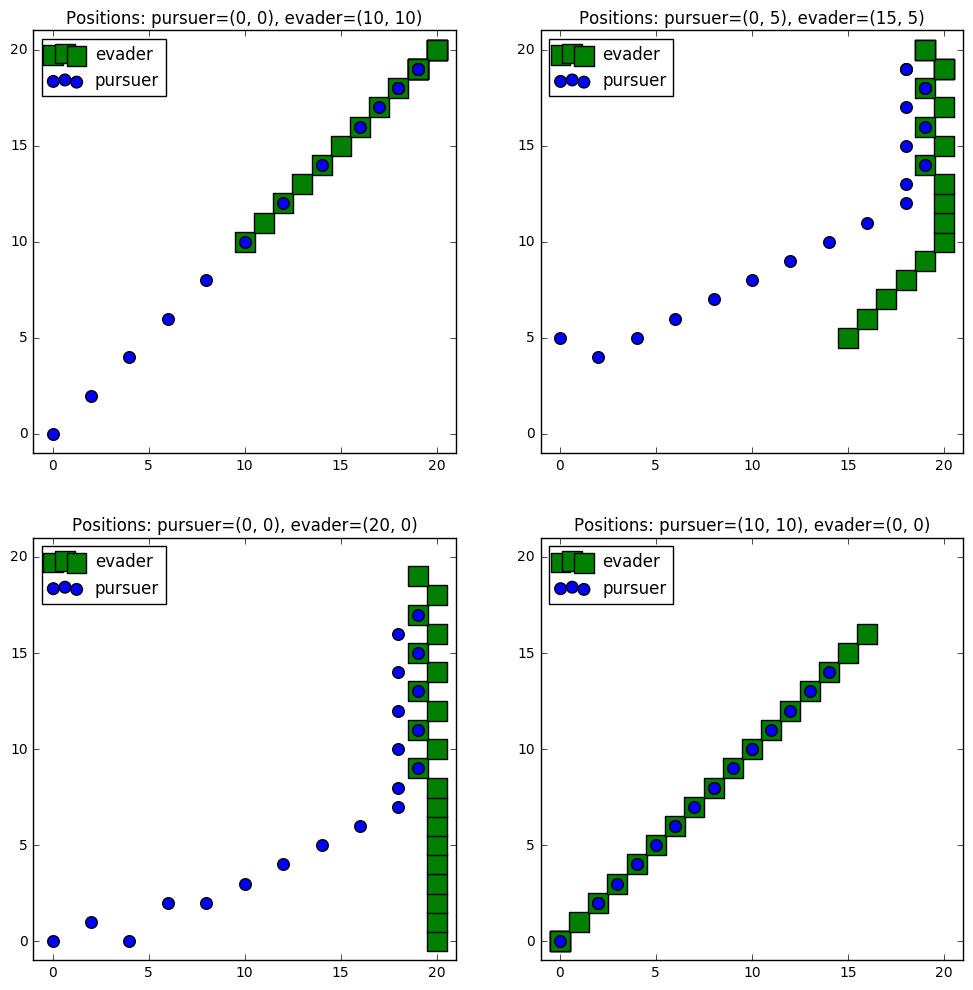

In [71]:
z_init_array = [(0, 0, 10, 10),
               (0, 5, 15, 5),
               (0, 0, 20, 0),
               (10, 10, 0, 0)]

f, ax = plt.subplots(2, 2, figsize=(12, 12))

for k, z_init in enumerate(z_init_array):
    p_pos_array = []
    e_pos_array = []

    p_pos = np.array(z_init[:2])
    e_pos = np.array(z_init[2:])

    n_steps = 20

    for i in range(n_steps):
        p_pos_array.append(p_pos)
        e_pos_array.append(e_pos)
        p_pos = np.array(p_pos) + UP[p_pos[0], p_pos[1], e_pos[0], e_pos[1]]
        e_pos = np.array(e_pos) + UE[p_pos[0], p_pos[1], e_pos[0], e_pos[1]]

    p_pos_array = np.array(p_pos_array)
    e_pos_array = np.array(e_pos_array)

    ax[k / 2, k % 2].scatter(e_pos_array[:, 0], e_pos_array[:, 1], s=200, c='g', marker='s')
    ax[k / 2, k % 2].scatter(p_pos_array[:, 0], p_pos_array[:, 1], s=70, c='b')
    ax[k / 2, k % 2].legend(['evader', 'pursuer'], loc=2)
    
    ax[k / 2, k % 2].set_title('Positions: pursuer=(%d, %d), evader=(%d, %d)' % z_init)
    ax[k / 2, k % 2].set_xlim((-1, n))
    ax[k / 2, k % 2].set_ylim((-1, n))
    

f.subplots_adjust()
plt.show()